<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## FIAP - Engenharia de Software

### Global Solution (GS) 2 - 2024 - 2 Semestre

### Projeto GS de análise de dados

GS 2

Tarefa no MS Teams: **Global Solution 2024 - Data Science - Pegada de Carbono - Análise de dados com AI e ML Scikit-learn**

Escopo: Analisar a **pegada de carbono** ([carbon footprint](https://en.wikipedia.org/wiki/Carbon_footprint)) das nações:<br>

  - Brasil
  - Comparar Brasil com:
    - Global
    - Continente Americano
    - OCDE
    - EUA

### Brasil

É importante observar que o Brasil tem uma base energética renovavel como a hidrelétrica, mas podemos sim desenvolver tecnologia sustentável. E que o Brasil é inovador em energia como biodisel, energia eólica, ethanol, etc...

- Quais são os pontos fortes do Brasil quanto a pegada de carbono?
- Onde o Brasil pode avançar para reduzir a pegada de carbono?

Este tipo de pergunta deve ser respondida com **DADOS**.

### Referências

- Pandas - https://pandas.pydata.org/docs/
- Jupyter - https://docs.jupyter.org/en/latest/
- Seaborn - https://seaborn.pydata.org/
- NumPy - https://numpy.org/
- SciPy - https://scipy.org/
- Scikit-learn - https://scikit-learn.org/stable/ (ML, AI)
- Estatística - https://www.statlearning.com/
- Data Science - https://jakevdp.github.io/PythonDataScienceHandbook/
- Matplotlib - https://matplotlib.org/
- HoloViews - https://holoviews.org/
- Python - https://penseallen.github.io/PensePython2e/
- Python Fluente - https://pythonfluente.com/
- Git - https://git-scm.com/doc
- Kaggle - https://www.kaggle.com/


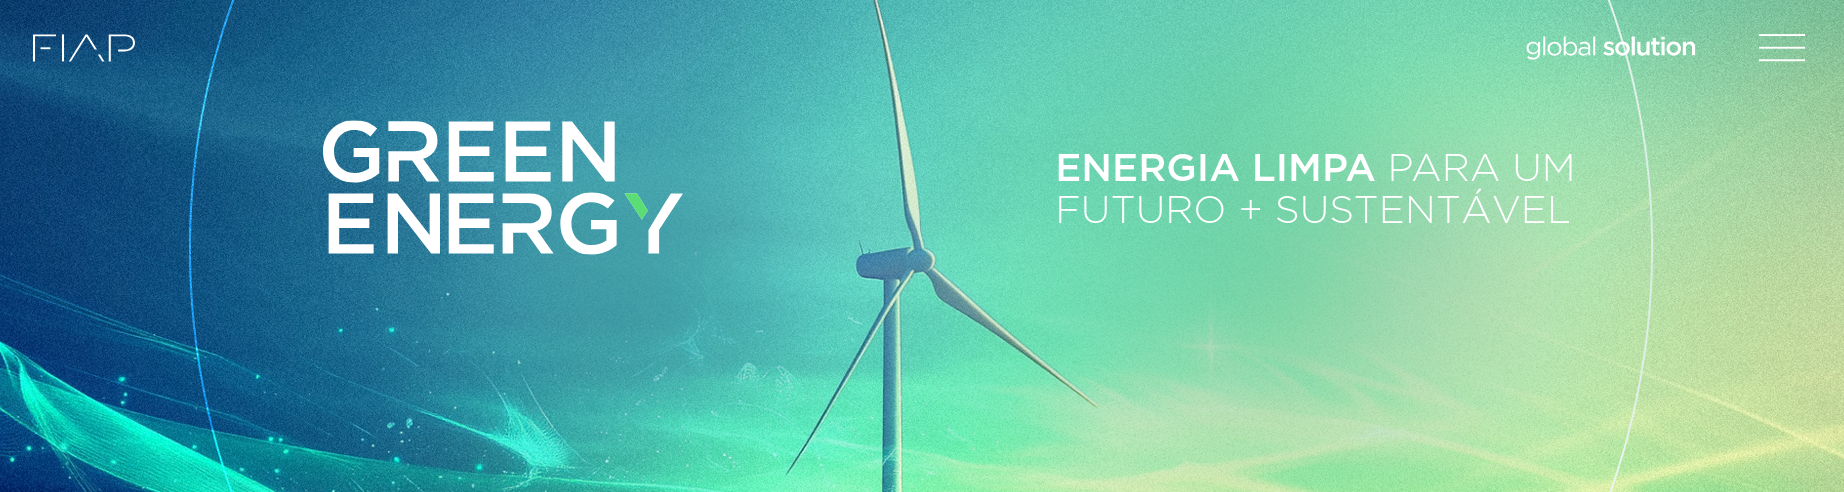

### Ideias de Perguntas

1. ~~Como o Brasil se posiciona em relação às emissões totais de gases de efeito estufa (GEE) em comparação ao total global?~~

2. Qual é a tendência das emissões de CO2 no Brasil nos últimos 20 anos?

3. ~~Quais setores (energia, transporte, agricultura, etc.) contribuem mais para a pegada de carbono do Brasil e como isso difere dos outros países?~~

4. Qual é a participação das fontes de energia renovável no Brasil em comparação com os países da OCDE?

5. Qual é a correlação entre PIB per capita e emissões de CO2 per capita no Brasil e em países da OCDE?

6. Como o Brasil se compara a outros países em termos de intensidade de carbono (emissões por unidade de PIB)?

7. Quais países, entre o Brasil, EUA e o continente americano, mostram maior redução relativa de emissões nos últimos anos?

8. Existe alguma relação entre a proporção de áreas florestais e as emissões líquidas de CO2 entre os países analisados?

9. Como o consumo de energia renovável impacta as emissões totais de GEE no Brasil e globalmente?

10. Como as emissões per capita no Brasil se comparam às dos EUA, da OCDE e do continente americano?

11. Como as políticas públicas voltadas para a redução de emissões no Brasil se refletem em mudanças no setor de energia em comparação aos países da OCDE?

12. Quais países apresentam a maior variação percentual nas emissões de gases de efeito estufa ao longo das últimas décadas, e como o Brasil se posiciona nessa análise?

## Perguntas

### Desenvolvedores:
- Lucas Moreno  - RM 97158
- Julia Ortiz   - RM 550204
- Juliana Maita - RM 99224

### 0. Importando e Tratando

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from typing import List, cast

- Importando um Dataset de https://carbonmonitor.org/
- Descartando uma coluna errônea e completamente nula
- Renomeando colunas para melhor visualização

In [16]:
dfDailyEmissionsPerSector = (
    pd.read_csv("carbonmonitor-global_datas_2024-11-19.csv", parse_dates=['date'], date_format='%d/%m/%Y')

    # O dataset tem uma coluna completamente nula - Removendo.
    .drop("Unnamed: 4", axis=1)

    # Renomeando colunas para melhor visualização
    .rename(columns={
        "country": "Country",
        "date":    "Date",
        "sector":  "Sector",
        "value":   "MtCO2"
        })
)
dfDailyEmissionsPerSector

,Country,Date,Sector,MtCO2
0,Brazil,2019-01-01,Domestic Aviation,0.023750
1,Brazil,2019-01-01,Ground Transport,0.201663
2,Brazil,2019-01-01,Industry,0.240156
3,Brazil,2019-01-01,International Aviation,0.018398
4,Brazil,2019-01-01,Power,0.107727
...,...,...,...,...
176395,WORLD,2024-09-30,Ground Transport,19.475600
176396,WORLD,2024-09-30,Industry,30.013200
176397,WORLD,2024-09-30,International Aviation,1.831910
176398,WORLD,2024-09-30,Power,36.848200


Fazendo um dataframe secundário para segurar os valores agregados entre todos os Setores

In [17]:
dfDailyEmissionsAggregate = dfDailyEmissionsPerSector.groupby(["Country", "Date"])["MtCO2"].sum().reset_index()
dfDailyEmissionsAggregate

,Country,Date,MtCO2
0,Brazil,2019-01-01,0.690146
1,Brazil,2019-01-02,0.903277
2,Brazil,2019-01-03,0.966163
3,Brazil,2019-01-04,0.951562
4,Brazil,2019-01-05,0.905974
...,...,...,...
29395,WORLD,2024-09-26,98.824990
29396,WORLD,2024-09-27,96.379110
29397,WORLD,2024-09-28,93.193950
29398,WORLD,2024-09-29,89.392350


### 1. Visualizando histórico de emissões de Toneladas Métricas de CO2 por país

- Usando dados agregados entre todos os Setores de cada País
- Descartando dados do mundo inteiro agregado
- Fazendo média móvel das emissões de cada país por 7 dias para melhorar a legibilidade do gráfico

In [18]:
dfQ1 = (dfDailyEmissionsAggregate
    # Descartando dados do mundo inteiro agregado
    [~dfDailyEmissionsAggregate["Country"].isin(["WORLD"])]

    # Fazendo média móvel das emissões de cada país por 7 dias para melhorar a legibilidade do gráfico
    .assign(rollingMtCO2 = lambda x:
        cast(pd.DataFrame, x) # Essa linha existe puramente para fazer o typing do IntelliSense funcionar
        .groupby("Country", as_index=False)["MtCO2"].rolling(7, min_periods=1).mean()["MtCO2"]
    )
)
dfQ1

,Country,Date,MtCO2,rollingMtCO2
0,Brazil,2019-01-01,0.690146,0.690146
1,Brazil,2019-01-02,0.903277,0.796712
2,Brazil,2019-01-03,0.966163,0.853195
3,Brazil,2019-01-04,0.951562,0.877787
4,Brazil,2019-01-05,0.905974,0.883424
...,...,...,...,...
27295,United States,2024-09-26,14.325019,14.143610
27296,United States,2024-09-27,14.110585,14.068329
27297,United States,2024-09-28,13.206505,13.942849
27298,United States,2024-09-29,12.190760,13.855953


Mostrando o gráfico

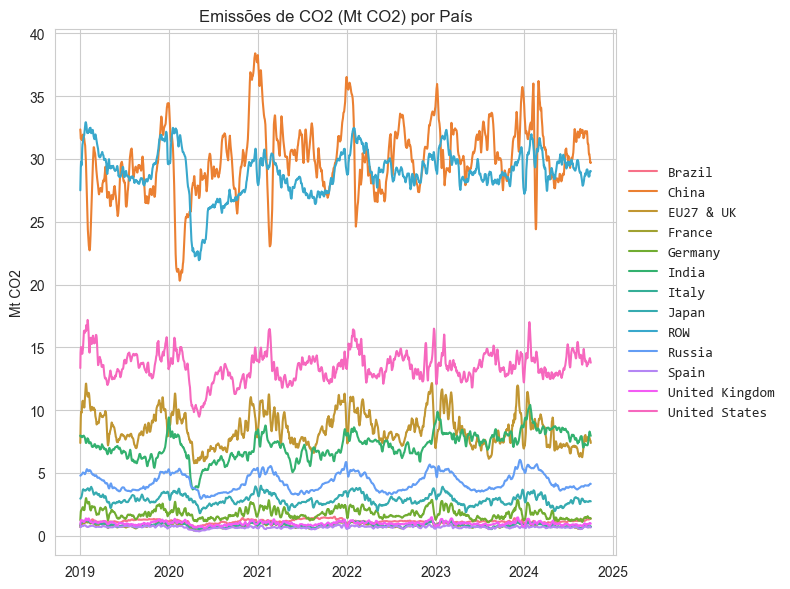

In [19]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
ax = sns.lineplot(
    data=dfQ1,
    y="rollingMtCO2",
    x="Date",
    hue="Country",
)

# Posicionando e customizando a legenda do gráfico
sns.move_legend(
    ax,
    "center left",
    bbox_to_anchor=(1, 0.5), # verticalmente no meio; para a direita do gráfico
    title=None,
    frameon=False,
    prop={"family": "consolas"}
)

plt.title("Emissões de CO2 (Mt CO2) por País")
plt.xlabel("")
plt.ylabel("Mt CO2")
plt.tight_layout()
plt.show()

### 2. Médias Móveis e Visibilidade nos gráficos

Definindo funções para auxiliar na renderização da figura

In [20]:
def Q2_processarMediaMovel(df: pd.DataFrame, janela=0):
    return (
        df
        .groupby(["Country", "Sector"], as_index=False)
        ["MtCO2"]
        .rolling(janela, min_periods=1)
        .mean()
        ["MtCO2"]
    )

def Q2_renderizarChart(df: pd.DataFrame, ax: plt.Axes, title: str, janela: int):
    if janela > 1:
        df = df.assign(MtCO2=Q2_processarMediaMovel(df, janela))
    g = sns.lineplot(
        data = df,
        y="MtCO2",
        x="Date",
        hue="Sector",
        legend="full",
        ax=ax,
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    return g

Selecionando dados somente sobre o Brasil

In [21]:
dfQ2 = dfDailyEmissionsPerSector.groupby("Country").get_group("Brazil")

Mostrando a Figura

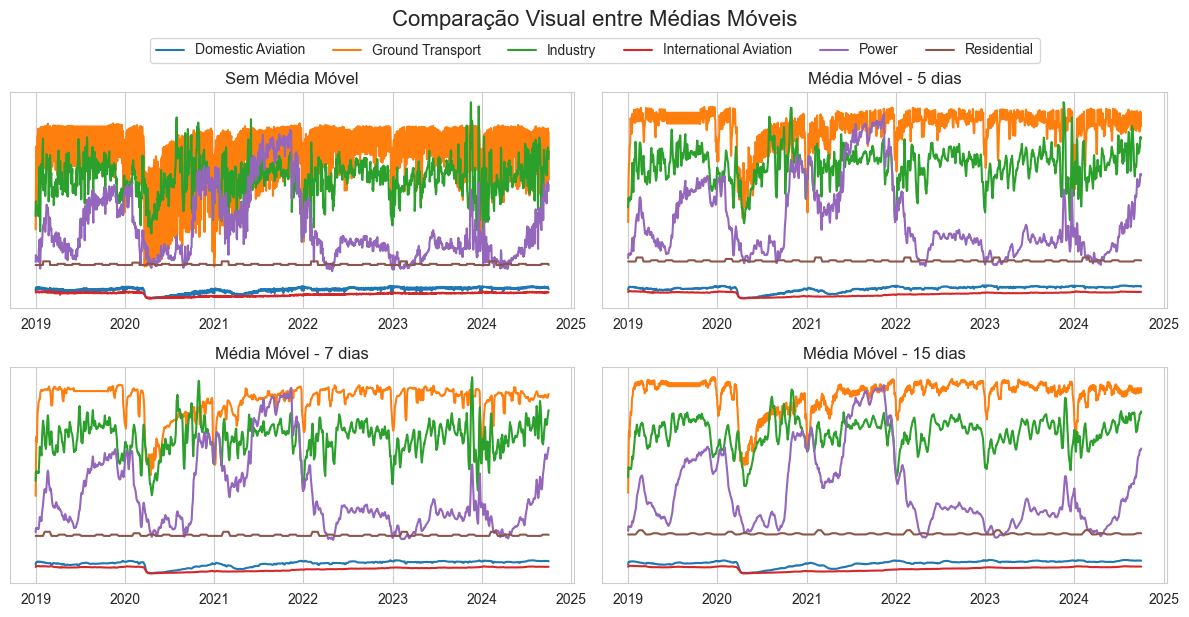

In [22]:
# Fazendo uma figura com subplots em 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes: List[List[plt.Axes]] # Explicitando o Type de `axes` para fazer o IntelliSense funcionar corretamente :/

# Plot 1 - Sem Média Móvel
Q2_renderizarChart(dfQ2, axes[0][0], "Sem Média Móvel", 0)
# Plot 2 - 5 Dias de Média Móvel
Q2_renderizarChart(dfQ2, axes[0][1], "Média Móvel - 5 dias", 5)
# Plot 3 - 7 Dias de Média Móvel
Q2_renderizarChart(dfQ2, axes[1][0], "Média Móvel - 7 dias", 7)
# Plot 4 - 15 Dias de Média Móvel
Q2_renderizarChart(dfQ2, axes[1][1], "Média Móvel - 15 dias", 15)

# Extraindo as handles e labels da legenda gerados pelo Seaborn
handles, labels = axes[0][0].get_legend_handles_labels()

# Removendo as legendas de todos os sub-plots, elas só serviam para fazer o passo acima :)
for ax in axes.flat:
    ax.legend_.remove()

# Manualmente renderizando uma legenda nova no topo da figura inteira
fig.legend(
    handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.92), ncol=6, frameon=True
)

plt.suptitle("Comparação Visual entre Médias Móveis", 
               x=0.5, y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Limpando variáveis
del fig, axes, handles, labels, ax

- Entre a Média de 5 para a Média de 7, a linha de "Ground Transport" é dramaticamente suavizada, sugerindo que há variação nas emissões deste setor, seguindo um período de 7 dias
- Bonus: Se sobrar tempo, considerar fazer isso também: https://seaborn.pydata.org/examples/timeseries_facets.html

### 3. Evolução de Emissões por País e Setor

- Selecionando somente 4 países para comparação lado a lado
- Fazendo média móvel por 30 dias das emissões de cada país por setor para melhorar a legibilidade dos gráficos

In [23]:
Q3_usarPaises = [
    "Brazil",  "United States",
    "France",  "China",
]

dfQ3 = (dfDailyEmissionsPerSector
    # Filtrando somente países selecionados
    [dfDailyEmissionsPerSector["Country"].isin(Q3_usarPaises)]

    # Fazendo média móvel por 30 dias das emissões de cada país por setor para melhorar a legibilidade do gráfico
    .assign(rollingMtCO2 = lambda x:
        cast(pd.DataFrame, x) # Essa linha existe puramente para fazer o typing do intellisense funcionar
        .groupby(["Country", "Sector"], as_index=False)["MtCO2"].rolling(30, min_periods=1).mean()["MtCO2"]
    )
)
dfQ3

,Country,Date,Sector,MtCO2,rollingMtCO2
0,Brazil,2019-01-01,Domestic Aviation,0.023750,0.023750
1,Brazil,2019-01-01,Ground Transport,0.201663,0.201663
2,Brazil,2019-01-01,Industry,0.240156,0.240156
3,Brazil,2019-01-01,International Aviation,0.018398,0.018398
4,Brazil,2019-01-01,Power,0.107727,0.107727
...,...,...,...,...,...
176389,United States,2024-09-30,Ground Transport,4.716510,4.553647
176390,United States,2024-09-30,Industry,2.577250,2.856086
176391,United States,2024-09-30,International Aviation,0.203197,0.209775
176392,United States,2024-09-30,Power,4.271040,4.733138


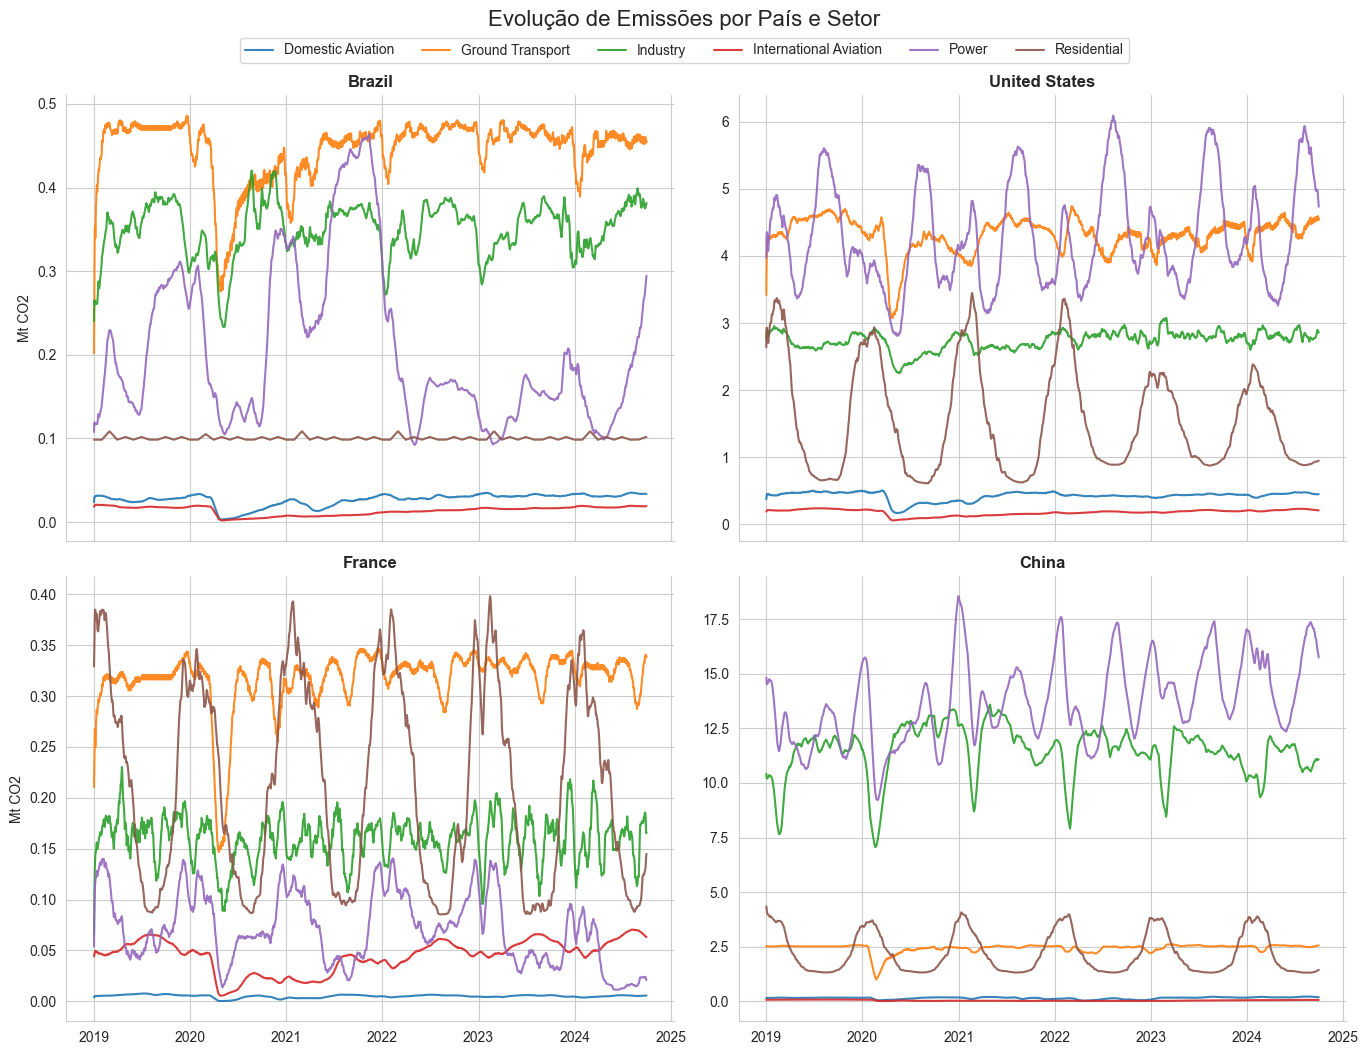

In [24]:
sns.set_style("whitegrid")
g = sns.relplot(
    kind="line",
    data=dfQ3,
    x="Date",
    y="rollingMtCO2", # Experimente mudar esse valor para "MtCO2" e veja como os gráficos ficam ilegíveis sem a média móvel :)
    col="Country",
    hue="Sector",
    alpha=0.9,
    facet_kws={
        "sharey": False,
    },
    col_wrap=2,
    col_order=Q3_usarPaises,
    aspect=1.2
)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(0.5, 0.99),
    ncol=6, title=None, frameon=True,
    # TODO: experimentar usar fonte Consolas aqui
)

for pais, ax in g.axes_dict.items():
    # ax.tick_params(axis='x', rotation=30)
    ax.set_title(pais, fontdict={"fontweight":"bold"})

g.set_axis_labels("", "Mt CO2")

g.figure.tight_layout()
g.figure.suptitle("Evolução de Emissões por País e Setor", 
               x=0.5, y=1.05, fontsize=16)

plt.show()
# Limpando variáveis
del g, pais, ax

- Obs: Note que cada gráfico está em escalas diferentes para melhor visualizar as tendências de cada país
- Para todos os países, há uma notável queda nos setores de transporte durante 2020, provavelmente devido à pandemia
- O setor residencial da França e Estados Unidos sobe muito durante o inverno, o da China sobe menos, e o do Brasil está praticamente imóvel.
    - Será que é porque não usamos ar condicionado/aquecedores em casa?
- O setor de indústria da China cai bastante depois do ano novo, será que alinha o ano novo chinês?

#### 3.1? Pegar gráfico da China e desenhar linhas em cada ano novo chinês

### 4. Como o Brasil se posiciona em relação às emissões totais de gases de efeito estufa (GEE) em comparação ao total global?

- Usando dados agregados entre todos os Setores de cada País
- Descartando dados de entidades agrupadas: WORLD, ROW (Rest of World), EU27 & UK

In [25]:
dfQ4 = dfDailyEmissionsAggregate[~dfDailyEmissionsAggregate["Country"].isin(["WORLD", "ROW", "EU27 & UK"])]
dfQ4

,Country,Date,MtCO2
0,Brazil,2019-01-01,0.690146
1,Brazil,2019-01-02,0.903277
2,Brazil,2019-01-03,0.966163
3,Brazil,2019-01-04,0.951562
4,Brazil,2019-01-05,0.905974
...,...,...,...
27295,United States,2024-09-26,14.325019
27296,United States,2024-09-27,14.110585
27297,United States,2024-09-28,13.206505
27298,United States,2024-09-29,12.190760


Mostrando gráfico de barras, ordenado pelos países com a maior média de emissões

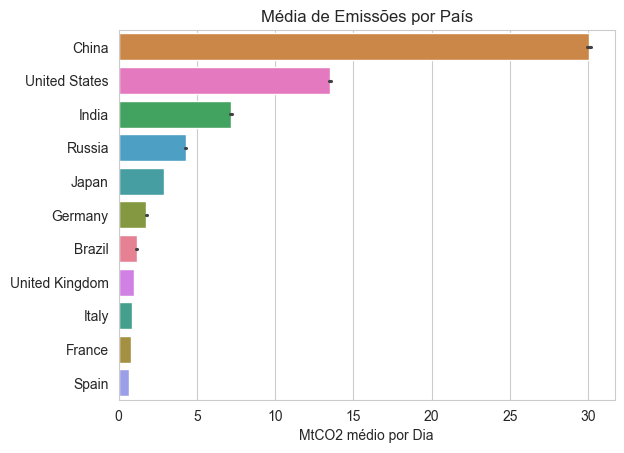

In [26]:
sns.barplot(
    data=dfQ4,
    y="Country",
    x="MtCO2",
    hue="Country",
    order=dfQ4.groupby("Country").mean().sort_values(by="MtCO2", ascending=False).index,
)

plt.title("Média de Emissões por País")
plt.xlabel("MtCO2 médio por Dia")
plt.ylabel("")
plt.show()

### 5. Distribuição de Emissão por Setor por País

- Usando dados de todos os Setores de cada País
- Agregando média entre todos os pontos para cada Setor de cada País
- Ordenando Países por maior total de emissões
- Normalizando emissões de cada Setor para mostrar uma porcentagem relativa ao total de cada País

In [27]:
dfQ5 = (
    dfDailyEmissionsPerSector
    # Remova o comentário desta linha para descartar entidades que não são países de verdade :)
    # [~dfDailyEmissionsPerSector["Country"].isin(["WORLD", "ROW", "EU27 & UK"])]

    # Agregando média entre todos os setores e transformando em uma pivot table
    .pivot_table(index="Country", columns="Sector", values="MtCO2", aggfunc="mean")

    # Ordenando países por maior total de emissões
    .loc[lambda df: df.sum(axis=1).sort_values(ascending=False).index]
    
    # Normalizando as emissões de cada setor para uma porcentagem relativa ao total de seu país
    .pipe(lambda df: df.div(df.sum(axis=1), axis=0) * 100)
)
dfQ5

Sector,Domestic Aviation,Ground Transport,Industry,International Aviation,Power,Residential
Country,,,,,,
WORLD,0.926579,18.166264,30.971655,1.362837,38.759508,9.813157
China,0.518563,8.130392,38.118603,0.154793,45.810272,7.267377
ROW,0.568487,20.790287,34.533446,2.010456,32.767964,9.329360
United States,3.147733,31.980249,20.291470,1.330890,31.871270,11.378389
EU27 & UK,0.436391,28.363496,20.457707,4.832133,26.346511,19.563761
India,0.232495,10.803892,28.988549,0.377204,52.265566,7.332294
Russia,1.060036,14.695306,19.533153,0.463133,53.335576,10.912796
Japan,0.787900,16.796212,23.836042,1.229139,47.266756,10.083951
Germany,0.201955,23.401985,18.219251,3.480901,33.803243,20.892665


(Admito que 80% do código nessa célula é magia do GPT)
- Renderizando um gráfico de Barras empilhadas para cada País e seus Setores
- Renderizando texto dentro de cada barra com o valor percentual de cada Setor
    - Valores baixos demais para caber em sua barra não serão mostrados

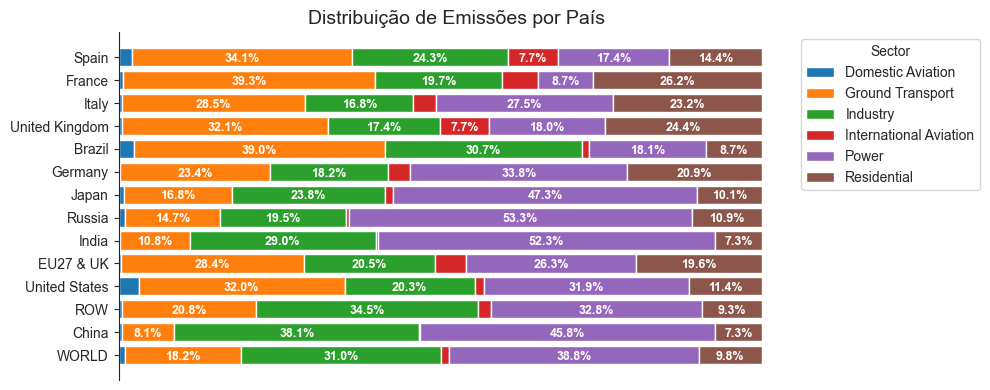

In [28]:
# Plot normalized stacked bar chart
sns.set_style("ticks")
plt.figure(figsize=(10, 4))

bottom = [0] * len(dfQ5)  # Initialize bottom positions for each country

for sector in dfQ5.columns:
    plt.barh(
        dfQ5.index,
        dfQ5[sector],
        left=bottom, 
        label=sector
    )
    
    # Add text inside each segment
    for i, value in enumerate(dfQ5[sector]):
        # Somente mostrar valores grandes o suficiente para caber no seu segmento
        if value > 7:
            plt.text(
                bottom[i] + value / 2,  # Middle of the current segment
                i-0.075,  # Corresponding country index, fine-tuned by 0.075
                f"{value:.1f}%",  # Format percentage
                ha="center", 
                va="center",
                fontsize=9,
                fontweight="bold",
                color="white",
            )
    # Update the bottom positions for stacking
    bottom = [b + v for b, v in zip(bottom, dfQ5[sector])]

# Customize plot
plt.title("Distribuição de Emissões por País", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])

plt.legend(title="Sector", bbox_to_anchor=(1, 1), loc="upper left")

sns.despine(bottom=True)
plt.tight_layout()

# Show plot
plt.show()

# Limpando variáveis
del bottom, i, value, sector

### 6. ?

### 7. ?

### 8. ?

### 9. Usar AI para tentar prever um país pelo seu padrão de emissões? (normalizar valores para não ficar óbvio)

### 10. Usar AI com regression para tentar prever o dataset até 2025?